In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
data= 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data -O car-data-2.csv

--2023-10-09 01:21:08--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'car-data-2.csv'

     0K .......... .......... .......... .......... ..........  3%  239K 6s
    50K .......... .......... .......... .......... ..........  6%  112K 9s
   100K .......... .......... .......... .......... .......... 10%  253K 7s
   150K .......... .......... .......... .......... .......... 13%  207K 7s
   200K .......... .......... .......... .......... .......... 17%  216K 6s
   250K .......... .......... .......... .......... .......... 20%  850K 5s
   300K .......... .......... .......... .......... .......... 2

In [4]:
df = pd.read_csv('car-data-2.csv')

In [5]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [6]:
features = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']

In [7]:
df = df[features]
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [9]:
df.fillna(0, inplace=True)

C:\Users\Fozan\AppData\Local\Temp\ipykernel_13504\4231983114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [10]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [11]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [12]:
df.rename(columns={'msrp': 'price'}, inplace=True)

C:\Users\Fozan\AppData\Local\Temp\ipykernel_13504\4251059150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'msrp': 'price'}, inplace=True)


In [13]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [14]:
#Calculate the mean price
mean_price = df['price'].mean()
print(mean_price)
# Create the 'above_average' binary variable
df['above_average'] = (df['price'] > mean_price).astype(int)
df['above_average']
df.drop("price", axis=1, inplace=True)


40594.737032063116


C:\Users\Fozan\AppData\Local\Temp\ipykernel_13504\3525516532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average'] = (df['price'] > mean_price).astype(int)
C:\Users\Fozan\AppData\Local\Temp\ipykernel_13504\3525516532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("price", axis=1, inplace=True)


In [15]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'above_average'],
      dtype='object')

In [16]:
df_full_train, df_test = train_test_split(df, random_state=1, test_size=0.2)

df_train, df_val = train_test_split(df_full_train, random_state=1, test_size=0.25)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# del df_train["above_average"]
# del df_val["above_average"]
# del df_test["above_average"]

len(df_full_train),len(df_test),len(df_train),len(df_val)


(9531, 2383, 7148, 2383)

#### Question 1: ROC AUC feature importance
#### ROC AUC could also be used to evaluate feature importance of numerical variables.

#### Let's do that

#### For each numerical variable, use it as score and compute AUC with the above_average variable
#### Use the training dataset for that
#### If your AUC is < 0.5, invert this variable by putting "-" in front

#### (e.g. -df_train['engine_hp'])

#### AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

#### Which numerical variable (among the following 4) has the highest AUC?

In [17]:
numerical_features =[ 'year', 'engine_hp', 'engine_cylinders',
        'highway_mpg', 'city_mpg',
       'above_average']

categorical_features = ['make', 'model', 
       'transmission_type', 'vehicle_style', ]

In [18]:
from sklearn.metrics import roc_auc_score

numerical_vars = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
auc_scores = {}

for var in numerical_vars:
    if df_train[var].corr(df_train['above_average']) < 0.5:
        var_auc = roc_auc_score(df_train['above_average'], -df_train[var])
    else:
        var_auc = roc_auc_score(df_train['above_average'], df_train[var])
    auc_scores[var] = var_auc

highest_auc_variable = max(auc_scores, key=auc_scores.get)
print("Variable with the highest AUC:", highest_auc_variable)
        

Variable with the highest AUC: engine_hp


#### Question 2: Training the model
#### Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
#### LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
#### What's the AUC of this model on the validation dataset? (round to 3 digits)

In [19]:
numerical = ["year", "engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]
categorical = ["make", "model", "transmission_type", "vehicle_style"]

dv = DictVectorizer(sparse=True)

train_dicts = df_train[categorical + numerical].to_dict(orient="records")

X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dicts)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]  # Probability of positive class
score = roc_auc_score(y_val, y_pred).round(3)
print("AUC on the validation dataset:", score)


AUC on the validation dataset: 0.98


#### Question 3: Precision and Recall
#### Now let's compute precision and recall for our model.

#### Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
#### For each threshold, compute precision and recall
#### Plot them
#### At which threshold precision and recall curves intersect?

In [20]:
thresholds = np.linspace(0, 1, 101)
precisions = []
recalls = []

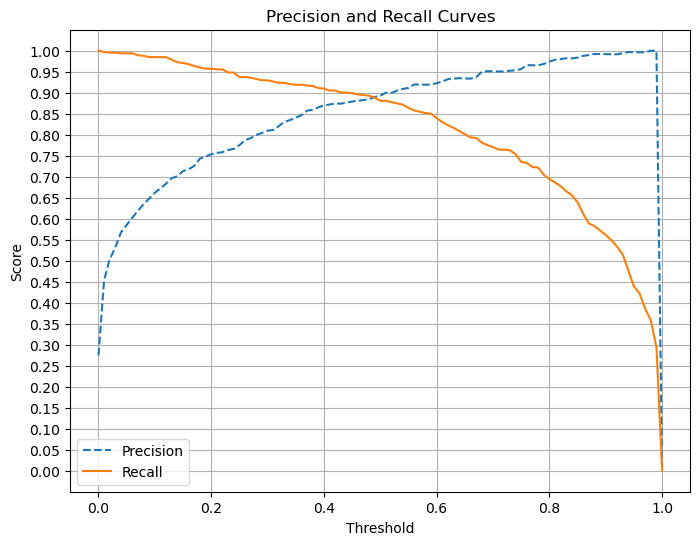

In [21]:
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    precisions.append(precision)
    recalls.append(recall)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision", linestyle='--')
plt.plot(thresholds, recalls, label="Recall", linestyle='-')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision and Recall Curves")
plt.grid(True)
   
    
custom_y_ticks = [i/20 for i in range(21)]
plt.yticks(custom_y_ticks)

plt.show()

###### 

#### Question 4: F1 score
##### Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

#### This is the formula for computing F1:
#### F1 = 2.(P.R/P+R)

#### Where P
#### is precision and R
#### is recall.

#### Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

#### At which threshold F1 is maximal?

In [22]:
scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds: 
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred <= t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1_score = 2 * ((p * r) / (p + r))
    
    scores.append((t, p, r, f1_score))

columns = ['threshold', 'precision', 'recall', 'f1_score']
df_scores = pd.DataFrame(scores, columns = columns)

max_f1_score = df_scores['f1_score'].max()
print(max_f1_score)
df_scores[df_scores['f1_score'] == max_f1_score].threshold

0.8902627511591964


C:\Users\Fozan\AppData\Local\Temp\ipykernel_13504\4113314833.py:17: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


51    0.51
Name: threshold, dtype: float64

#### Question 5: 5-Fold CV
#### Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

#### KFold(n_splits=5, shuffle=True, random_state=1)
#### Iterate over different folds of df_full_train
#### Split the data into train and validation
#### Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
#### Use AUC to evaluate the model on validation
#### How large is standard devidation of the scores across different folds?

In [23]:
kf=KFold(n_splits=5, shuffle=True, random_state=1)


In [24]:


auc_scores = []

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

dv = DictVectorizer(sparse=False)

for train_idx, val_idx in kf.split(df_full_train):

    df_train_fold = df_full_train.iloc[train_idx]
    df_val_fold = df_full_train.iloc[val_idx]

    y_train_fold = df_train_fold.above_average.values
    y_val_fold = df_val_fold.above_average.values


    del df_train_fold["above_average"]
    del df_val_fold["above_average"]

    train_dicts = df_train_fold.to_dict(orient='records')
    val_dicts = df_val_fold.to_dict(orient='records')

    X_train_fold = dv.fit_transform(train_dicts)
    X_val_fold = dv.transform(val_dicts)

    model.fit(X_train_fold, y_train_fold)
    
    y_pred_fold = model.predict_proba(X_val_fold)[:, 1]
    auc_fold = roc_auc_score(y_val_fold, y_pred_fold)
    auc_scores.append(auc_fold)


In [25]:
print("Standard Deviation of AUC Scores:", np.std(auc_scores))

Standard Deviation of AUC Scores: 0.0021000901343348334


#### Question 6: Hyperparemeter Tuning
#### Now let's use 5-Fold cross-validation to find the best parameter C

#### Iterate over the following C values: [0.01, 0.1, 0.5, 10]
#### Initialize KFold with the same parameters as previously
#### Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
#### Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
#### Which C leads to the best mean score?

In [26]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [27]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient="records")

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [28]:
n_splits = 5

for C in [0.01, 0.1, 0.5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('\nC=%s %.3f +- %.3f\n' % (C, np.mean(scores), np.std(scores)))




C=0.01 0.952 +- 0.002



C:\Users\Fozan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



C=0.1 0.972 +- 0.002



C:\Users\Fozan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Fozan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


C=0.5 0.979 +- 0.003



C:\Users\Fozan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Fozan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


C=10 0.980 +- 0.002



C:\Users\Fozan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
